__Title:__ Case Study 6: SVM & SGD  
__Authors:__ Will Butler, Robert (Reuven) Derner 
__Date:__ 12/13/23 

## Business Understanding

Firewall traffic

A cybersecur 

Data Source:

Provided by client with metadata dictionary regarding terms 

In [1]:
# Import data from github (next phase)
# url = 'https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/log2.csv'
# data = pd.read_csv(url, encoding = "utf-8")

In [67]:
# Create a DataFrame from the data
df = pd.read_csv(file_path, encoding = "utf-8")

## Data Quality
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [1]:
file_path = 'all_train.csv'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(file_path)

### Examine the data

In [6]:
df.shape

(7000000, 29)

In [7]:
df.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


__Missing Values__  
The dataset contains no missing values upon code examination.

In [8]:
df.isnull().sum()

# label    0
f0         0
f1         0
f2         0
f3         0
f4         0
f5         0
f6         0
f7         0
f8         0
f9         0
f10        0
f11        0
f12        0
f13        0
f14        0
f15        0
f16        0
f17        0
f18        0
f19        0
f20        0
f21        0
f22        0
f23        0
f24        0
f25        0
f26        0
mass       0
dtype: int64

In [9]:
# Features with Null Values and Percent missing
null_df = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / df.shape[0] * 100),2)

null_df

,Feature,Value,Percent


In [10]:
df.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,...,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,...,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,...,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,...,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,...,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,...,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,...,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03


### Examine any Correlations 

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [12]:
correlation_matrix = df.corr()

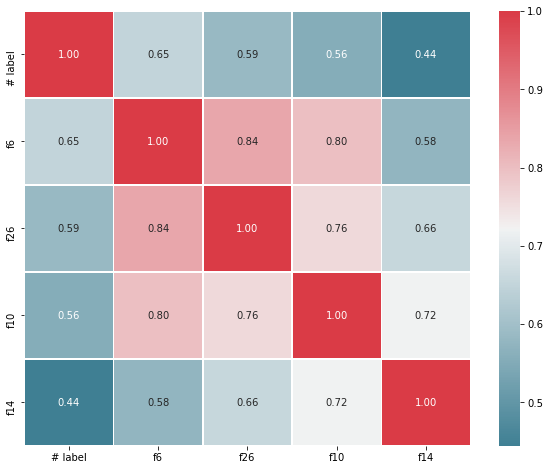

In [13]:
# Select correlations above 0.4 or below -0.4 for the target variable
target_corr = correlation_matrix['# label']
target_corr = target_corr[(target_corr > 0.4) | (target_corr < -0.3)].sort_values(ascending=False)

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.zeros((len(target_corr), len(target_corr)))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Customize the color palette if desired
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap for the selected correlations
sns.heatmap(correlation_matrix.loc[target_corr.index, target_corr.index], 
            annot=True, fmt=".2f", cmap=cmap, mask=mask, linewidths=.5)


plt.show()

## EDA Exploratory Data Analysis

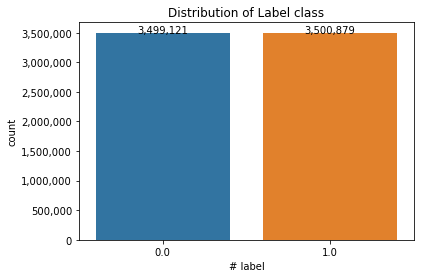

In [14]:
#Visualize the distribution of the target variable
ax = sns.countplot(x='# label', data=df)
plt.title('Distribution of Label class')

# Add annotations for the count of each class
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{count:,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Format y-axis labels with commas
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.show()


### Modeling 

In [7]:
#Split the data into features and Target Variable
X = df.drop('# label', axis=1)
y = df['# label']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=219)


#### Tensor Flow Model

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [9]:


# Create a simple feedforward neural network
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])



In [10]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mean_squared_error','mean_absolute_error'])


In [11]:
# Create lists to store accuracy values during training
train_accuracy = []
val_accuracy = []
val_loss = []
loss = []



In [12]:
#create early stop
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1,patience=10)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1856      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), callbacks = early_stop)

Epoch 1/25
175000/175000 [==============================] - 316s 2ms/step - loss: 0.3197 - accuracy: 0.8493 - mean_squared_error: 0.1021 - mean_absolute_error: 0.2038 - val_loss: 0.2990 - val_accuracy: 0.8599 - val_mean_squared_error: 0.0955 - val_mean_absolute_error: 0.1974
Epoch 2/25
175000/175000 [==============================] - 311s 2ms/step - loss: 0.2988 - accuracy: 0.8600 - mean_squared_error: 0.0954 - mean_absolute_error: 0.1907 - val_loss: 0.2949 - val_accuracy: 0.8628 - val_mean_squared_error: 0.0940 - val_mean_absolute_error: 0.1935
Epoch 3/25
175000/175000 [==============================] - 299s 2ms/step - loss: 0.2962 - accuracy: 0.8620 - mean_squared_error: 0.0944 - mean_absolute_error: 0.1887 - val_loss: 0.2911 - val_accuracy: 0.8642 - val_mean_squared_error: 0.0928 - val_mean_absolute_error: 0.1863
Epoch 4/25
175000/175000 [==============================] - 304s 2ms/step - loss: 0.2940 - accuracy: 0.8636 - mean_squared_error: 0.0936 - mean_absolute_error: 0.1872 - val

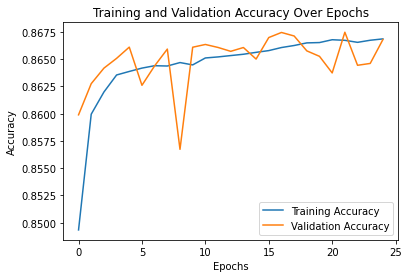

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.savefig('training_accuracy_plot.png')
plt.show()

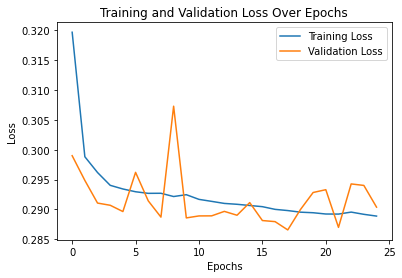

In [21]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.savefig('training_validation_loss_plot.png')
plt.show()

### PyTorch Model

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [23]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [24]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [25]:


class CustomModel(nn.Module):
    def __init__(self, input_size):
        super(CustomModel, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.activation(self.layer4(x))
        x = self.sigmoid(self.output_layer(x))
        return x


input_size = X_train.shape[1]
model = CustomModel(input_size)


In [26]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters())
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.1, verbose=True)  # Adjust parameters accordingly
early_stop = False

In [27]:
# Initialize lists to store training and validation losses, and accuracy
train_losses = []
test_losses = []
accuracies = []

num_epochs = 25
early_stop = False  # Flag to check for early stopping

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    average_train_loss = train_loss / len(train_loader)
    train_losses.append(average_train_loss)

    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in test_loader:
            outputs = model(inputs)
            test_loss += criterion(outputs, labels.view(-1, 1)).item()

            # Update accuracy
            predicted_labels = (outputs >= 0.5).float()
            correct += (predicted_labels == labels.view(-1, 1)).sum().item()
            total += labels.size(0)

        average_test_loss = test_loss / len(test_loader)
        test_losses.append(average_test_loss)

    # Calculate accuracy
    accuracy = correct / total if total > 0 else 0
    accuracies.append(accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {average_train_loss}, Validation Loss: {average_test_loss}, Accuracy: {accuracy * 100:.2f}%')

    scheduler.step(average_test_loss)

    # Check for early stopping
    if scheduler.num_bad_epochs >= scheduler.patience:
        print("Early stopping triggered.")
        early_stop = True
        break


Epoch 1/25, Training Loss: 0.5798218102071967, Validation Loss: 0.57573461742333, Accuracy: 83.00%
Epoch 2/25, Training Loss: 0.5745139904907771, Validation Loss: 0.5766850512279783, Accuracy: 84.87%
Epoch 3/25, Training Loss: 0.5739587223849978, Validation Loss: 0.5726580111748831, Accuracy: 84.50%
Epoch 4/25, Training Loss: 0.5736212479865551, Validation Loss: 0.574186994631631, Accuracy: 84.69%
Epoch 5/25, Training Loss: 0.5734229763099126, Validation Loss: 0.5739162197399139, Accuracy: 85.33%
Epoch 6/25, Training Loss: 0.573157571046182, Validation Loss: 0.5744150933688027, Accuracy: 83.65%
Epoch 7/25, Training Loss: 0.5731002311355727, Validation Loss: 0.5719771156569889, Accuracy: 84.90%
Epoch 8/25, Training Loss: 0.5729254923762594, Validation Loss: 0.5714956051785606, Accuracy: 85.19%
Epoch 9/25, Training Loss: 0.572765774851186, Validation Loss: 0.5711403479651043, Accuracy: 85.06%
Epoch 10/25, Training Loss: 0.572719687330212, Validation Loss: 0.5729586427375248, Accuracy: 85

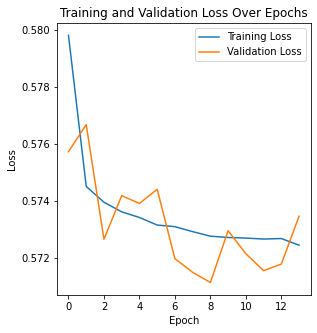

In [31]:


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')

plt.savefig('training_validation_losses_subplot.png')
plt.show()

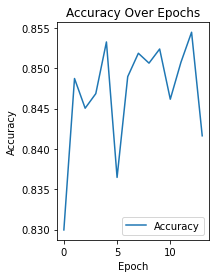

In [30]:
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')


plt.savefig('losses_and_accuracies_subplots.png')